In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from detection.data import load_data

vehicle_imgs, non_vehicle_imgs = load_data("small")

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/non-vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/vehicles_smallset already unzipped.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/non-vehicles_smallset already unzipped.
Found 1196 vehicle images and 1125 non-vehicle images in data folder.
Processing vehicle images.
Processing non-vehicle images.


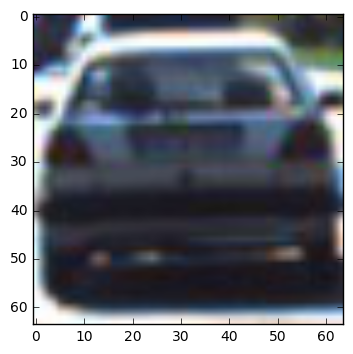

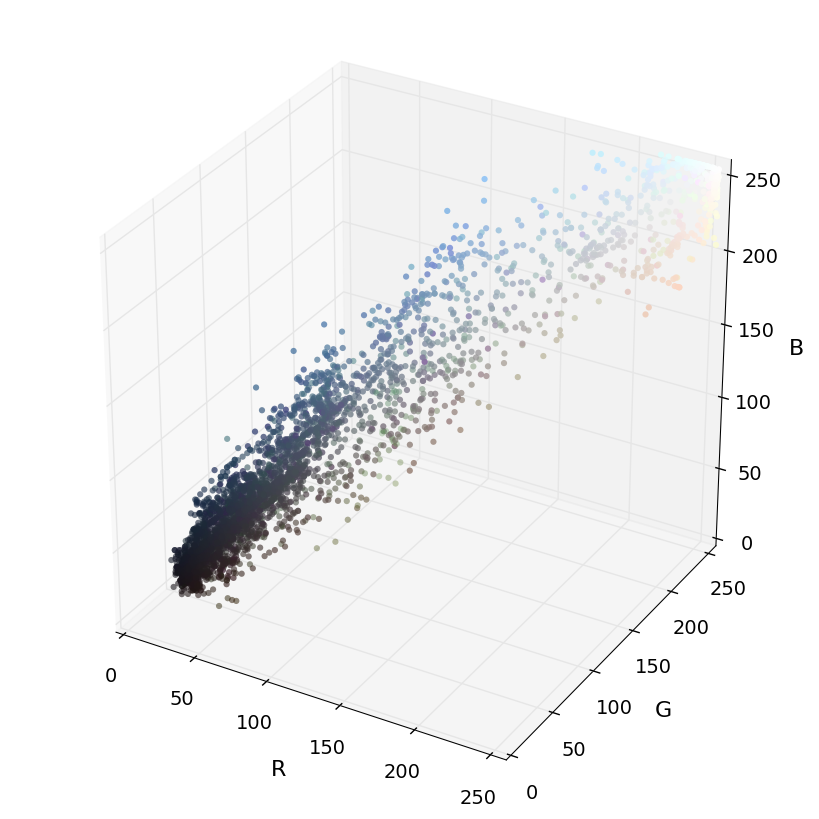

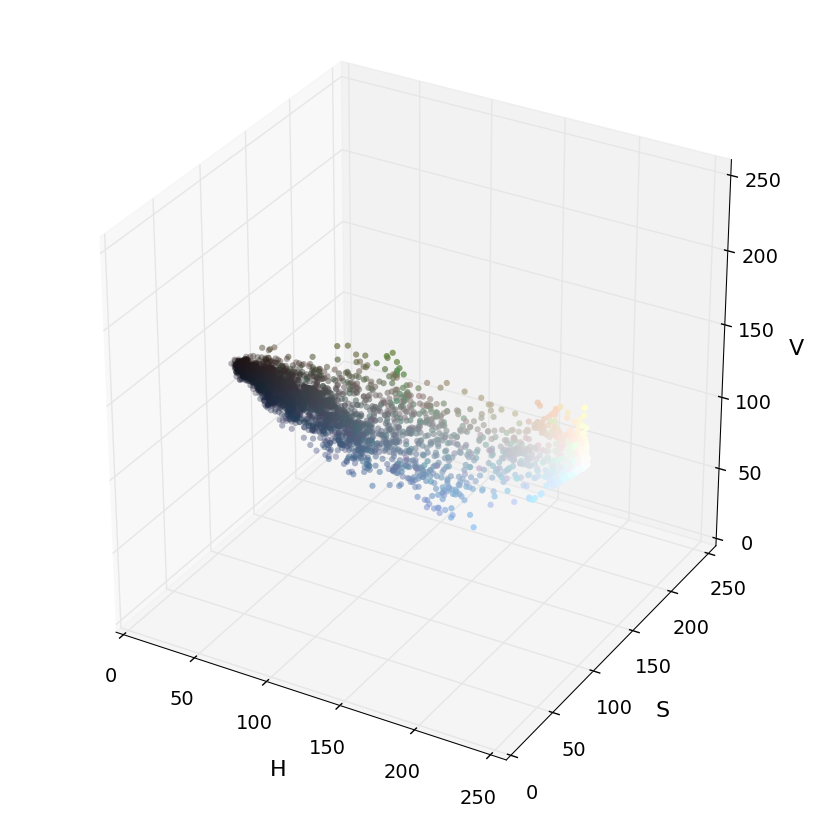

In [2]:
# Read a color image
import random

def display_image(images):
  index = random.randint(0, len(images) -1)
  img = images[index]

  # Select a small fraction of pixels to plot by subsampling it
  scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
  img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

  # Convert subsampled image to desired color space(s)
  img_small_RGB = img_small
  img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_RGB2LUV)
  img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_RGB2YCrCb)
#   img_small_HSV = threshold(img_small_HSV, 1, (100, 255))
#   img_small_HSV = threshold(img_small_HSV, 2, (150, 255))
  img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

  plt.imshow(img)
  plt.show()

  # Plot and show
  plot3d(img_small_RGB, img_small_rgb)
  plt.show()

  plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
  plt.show()

def threshold(image, channel, thresh):
  zero = image[:,:,0]
  one = image[:,:,1]
  two = image[:,:,2]
  
  if channel == 0:
    return np.dstack((thresh_c(zero, thresh), one, two))
  elif channel == 1:
    return np.dstack((zero, thresh_c(one, thresh), two))
  elif channel == 2:
    return np.dstack((zero, one, thresh_c(two, thresh)))
    
def thresh_c(c_image, thresh):
  c_image[(c_image<=thresh[0])|(c_image>=thresh[1])] = 0
  return c_image

display_image(vehicle_imgs)
# display_image(non_vehicle_imgs)

It looks like cars have much higher saturation values than the rest of the world.
An interesting threshold could be S > 100 and V >150

(64, 64, 3)


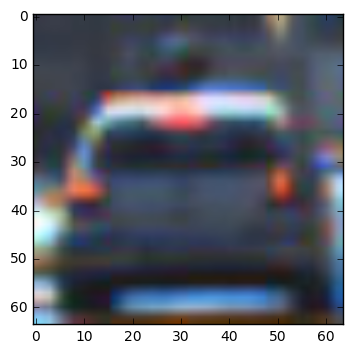

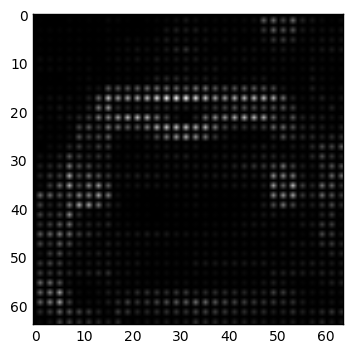

In [3]:
from detection.shared_functions import get_hog_features
img = vehicle_imgs[10]
r = img[:,:,0]
orient=9
pix_per_cell=16
cell_per_block=2
featres, hog_image = get_hog_features(r, orient, cell_per_block, pix_per_cell, vis=True)
print(img.shape)
plt.imshow(img)
plt.show()
plt.imshow(hog_image, cmap='gray')
plt.show()